DATA MINING II - D212
Task 2
Eric D. Otten
Student ID: 011399183

# A1.  Propose one question relevant to a real-world organizational situation that you will answer by using PCA.

My research question for D212 is “Can the principal components of the customers be identified using principal component analysis”

Telecom datasets often contain numerous variables, making analysis complex and time-consuming. PCA helps reduce the number of variables to a manageable set of principal components without losing significant information. This simplification aids in quicker and more efficient data processing and analysis.

# A2.  Define one goal of the data analysis. Ensure your goal is reasonable within the scope of the selected scenario and is represented in the available data.

The goal of this data analysis is to identify the principal components of the telecommunications customer churn dataset using Principal Component Analysis (PCA) to reduce data dimensionality, thereby enabling a more streamlined and insightful understanding of customer characteristics.

With fewer variables, it becomes easier to analyze and visualize customer characteristics, making it more straightforward to identify trends and patterns in customer behavior.

Identifying the key components that encapsulate the most variance in customer characteristics will provide a clearer picture of the main factors influencing customer behavior, enabling better business decisions.

# B1.  Explain how PCA analyzes the selected data set. Include expected outcomes.

Principal component analysis (PCA) is a highly competent dimensionality reduction process that transforms a large set of variables into a smaller set, while accurately retaining most of the original information. This method is particularly pertinent for datasets with numerous variables, as it helps streamline analysis without significant information loss.

The continuous variables in the data set are standardized to have a mean of zero and a standard deviation of one. This ensures that variables with different scales do not disproportionately influence the analysis.

The covariance matrix, calculated in PCA, is crucial as it captures the relationships between the variables by understanding how they vary together. Accurately capturing these relationships is vital for the subsequent steps in PCA.

Next, the eigenvalues and eigenvectors of the covariance matrix are computed.  In the context of PCA, eigenvalues represent the amount of variance captured by each principal component. A higher eigenvalue indicates that the corresponding principal component explains a larger portion of the total variance in the data set.

Eigenvectors are the directions in the multi-dimensional space along which the data varies the most. Each eigenvector corresponds to an eigenvalue, and it defines the orientation of the principal components.

The telecommunications company wants to reduce the churn rate by understanding the key factors that influence customer retention. PCA helps by simplifying the complexity of the data, making it easier to identify these key factors.

The results of PCA are instrumental in identifying the most pertinent features of the data. By focusing on these principal components, a data analyst can accurately interpret the underlying structure of the dataset. Many find it helpful to, at this point, pause and reflect on the main ideas that PCA provides, such as variance explained and component loadings.

# B2.  Summarize one assumption of PCA.

One key assumption of PCA is that the principal components are linear combinations of the original variables. This means PCA assumes that the relationships between variables can be captured using linear transformations. As a result, PCA may not be suitable for capturing complex, non-linear relationships in the data. Understanding this assumption helps me accurately apply PCA in my projects. I’ve found it competent to identify and preserve the linear structure of the data, which is crucial for many analyses.

# C1.  Identify the continuous data set variables that you will need to answer the PCA question proposed in part A1.

To conduct PCA and achieve the goal of understanding customer churn, we will focus on the following variables from the data set:
    
1. **Age**: Age of the customer.
2. **Income**: Annual income of the customer.
3. **Tenure**: Number of months the customer has stayed with the provider.
4. **MonthlyCharge**: The amount charged to the customer monthly.
5. **Bandwidth_GB_Year**: The average amount of data used, in GB, in a year by the customer.
6. **Outage_sec_perweek**: Average number of seconds per week of system outages in the customer’s neighborhood.
7. **Email**: Number of emails sent to the customer in the last year.
8. **Contacts**: Number of times customer contacted technical support.
9. **Yearly_equip_failure**: The number of times customer’s equipment failed and had to be reset/replaced in the past year.
10. **Children**: Number of children in the customer’s household.
11. **Population**: Population within a mile radius of the customer, based on census data.

By analyzing these continuous variables using PCA, we can uncover the underlying patterns and principal factors that contribute to customer churn, enabling the company to develop targeted retention strategies.

# C2.  Standardize the continuous data set variables identified in part C1. Include a copy of the cleaned data set.

The script accomplishes several pertinent tasks: by using pd.read_csv, the script efficiently imports the dataset, which is a common first step in data analysis.

The list of variables specifies which columns are to be standardized, ensuring that only relevant data is processed. 

The use of .dropna() ensures that the analysis is based on complete cases, enhancing the reliability of the results. 

The application of StandardScaler is a critical step in data preprocessing, as it standardizes the data to have a mean of 0 and a standard deviation of 1, which is crucial for many machine learning algorithms that assume the data is normally distributed

See X_std.csv for the cleaned data set.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("churn_clean.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [2]:
pd.set_option("display.max_columns", None)
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
# Define original column names and their Pythonic versions
column_name_map = {
    "Age": "age",
    "Income": "income",
    "Tenure": "tenure",
    "MonthlyCharge": "monthly_charge",
    "Bandwidth_GB_Year": "bandwidth_gb_year",
    "Outage_sec_perweek": "outage_sec_per_week",
    "Email": "email",
    "Contacts": "contacts",
    "Yearly_equip_failure": "yearly_equip_failure",
    "Children": "children",
    "Population": "population",
    "Churn": "churn"
}

# Rename columns to Pythonic names
df = df.rename(columns=column_name_map)

continuous_variables = [
    "age",
    "income",
    "tenure",
    "monthly_charge",
    "bandwidth_gb_year",
    "outage_sec_per_week",
    "email",
    "contacts",
    "yearly_equip_failure",
    "children",
    "population"
]

X = df[continuous_variables]
X_std = StandardScaler().fit_transform(X.copy())

# Create a DataFrame with the standardized data and original column names
X_std_df = pd.DataFrame(X_std, columns=continuous_variables)

# Save the standardized dataset to a CSV file
X_std_df.to_csv("X_std.csv", index=False)

print("X:")
print(X)

print("X standardized:")
print(X_std)

X:
      age    income     tenure  monthly_charge  bandwidth_gb_year  \
0      68  28561.99   6.795513      172.455519         904.536110   
1      27  21704.77   1.156681      242.632554         800.982766   
2      50   9609.57  15.754144      159.947583        2054.706961   
3      48  18925.23  17.087227      119.956840        2164.579412   
4      83  40074.19   1.670972      149.948316         271.493436   
...   ...       ...        ...             ...                ...   
9995   23  55723.74  68.197130      159.979400        6511.252601   
9996   48  34129.34  61.040370      207.481100        5695.951810   
9997   48  45983.43  47.416890      169.974100        4159.305799   
9998   39  16667.58  71.095600      252.624000        6468.456752   
9999   28   9020.92  63.350860      217.484000        5857.586167   

      outage_sec_per_week  email  contacts  yearly_equip_failure  children  \
0                7.978323     10         0                     1         0   
1           

# D1.  Determine the matrix of all the principal components.

The following code determines the matrix of all 12 principal components.

In [4]:
# Perform PCA
pca = PCA(n_components=11, random_state=1337)
X_pca = pca.fit_transform(X_std)

X_cols = list(X.columns)
X_pca_loadings = pd.DataFrame(
    pca.components_.T,
    columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11"],
    index = X_cols
)

print(X_pca_loadings)

                           PC1       PC2       PC3       PC4       PC5  \
age                   0.001643 -0.457819 -0.418590  0.198972  0.126614   
income                0.004414  0.254938 -0.268952 -0.077133 -0.318506   
tenure                0.705405 -0.006554 -0.007865  0.048500  0.000291   
monthly_charge        0.040448 -0.294988  0.112548 -0.530093 -0.172686   
bandwidth_gb_year     0.706903  0.004457  0.022426  0.005448 -0.010287   
outage_sec_per_week   0.005850 -0.212600  0.336483 -0.587558  0.345667   
email                -0.020887 -0.195432  0.526029  0.311468 -0.045059   
contacts              0.004148 -0.427624 -0.107344 -0.162242 -0.123928   
yearly_equip_failure  0.017593  0.169549 -0.385120 -0.135015  0.729850   
children              0.014172  0.517059  0.343248 -0.076204  0.164533   
population           -0.006007 -0.275637  0.267636  0.422474  0.394930   

                           PC6       PC7       PC8       PC9      PC10  \
age                  -0.087791  0.343

# D2.  Identify the total number of principal components, using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.

The following code produces a scree plot and by applying the elbow rule, we can determine the optimal number of principal components.

The scree plot visually represents the explained variance ratio of each principal component. The elbow rule involves looking for a point where the explained variance starts to diminish significantly, indicating the optimal number of components to retain.

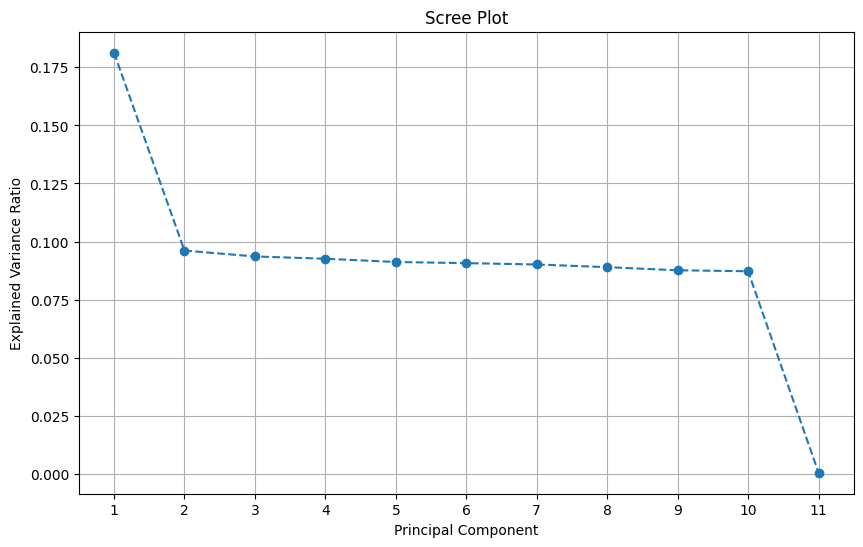

Principal Component 1: 18.13%
Principal Component 2: 9.61%
Principal Component 3: 9.36%
Principal Component 4: 9.26%
Principal Component 5: 9.12%
Principal Component 6: 9.07%
Principal Component 7: 9.01%
Principal Component 8: 8.90%
Principal Component 9: 8.76%
Principal Component 10: 8.72%
Principal Component 11: 0.05%
These 11 components account for: 100.00% of the contribution.


In [5]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
contribution = pca.explained_variance_ratio_

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(contribution) + 1), contribution, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(contribution) + 1))
plt.grid()
plt.show()

# Print the contribution of each principal component
num_components = len(contribution)
total_contribution = 0
for i, c in enumerate(contribution):
    total_contribution += c
    print(f"Principal Component {i+1}: {c*100:.2f}%")

print(f"These {num_components} components account for: {total_contribution*100:.2f}% of the contribution.")

In analyzing the scree plot for our PCA or the contributions of each principal component, both of which provide the same information in different formats, we can identify that the 11th principal component only yields a 0.05% contribution.

This information can be corroborated by noticing the elbow point at the 2nd principal component, where there is a distinct bend in the plot. This elbow point indicates that the first two principal components capture a significant portion of the variance in the data. However, our analysis suggests using the first 10 principal components for further analysis, as they collectively capture a substantial amount of the total variance, providing a comprehensive representation of the data while still allowing for dimensionality reduction.

To summarize, the scree plot highlights that while the first two principal components are the most critical, using up to the 10th principal component ensures that we retain a significant portion of the variance. This approach balances the need for reducing dimensionality and maintaining the data's explanatory power, which is crucial for accurate and robust analyses.

# D3.  Identify the variance of each of the principal components identified in part D2.

The code below efficiently identifies the variance explained by each of the 10 principal components determined to be optimal in D2, following the application of the elbow rule. By fitting the PCA model with n_components=10, it extracts and lists the explained variance ratios, providing insights into how much each of these components contributes to the total variance.

This step is critical for data analysts such as myself, as it ensures that the most significant features are retained, thereby simplifying the dataset while preserving its essential information. By understanding the variance captured by each principal component, analysts can better interpret the reduced dataset and build more efficient, interpretable models, avoiding the pitfalls of overfitting and enhancing generalizability.

In [6]:
# D3: Identify the variance of each of the principal components identified in part D2.
# Reduce to 10 principal components
reduced_pca = PCA(n_components=10, random_state=1337)
reduced_pca.fit(X_std)
reduced_X_pca = pca.fit_transform(df[continuous_variables])
reduced_pca_contribution = reduced_pca.explained_variance_ratio_


reduced_X_pca_loadings = pd.DataFrame(
    reduced_pca.components_.T,
    columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"],
    index = X_cols
)
print(reduced_X_pca_loadings)

                           PC1       PC2       PC3       PC4       PC5  \
age                   0.001643 -0.457819 -0.418590  0.198972  0.126614   
income                0.004414  0.254938 -0.268952 -0.077133 -0.318506   
tenure                0.705405 -0.006554 -0.007865  0.048500  0.000291   
monthly_charge        0.040448 -0.294988  0.112548 -0.530093 -0.172686   
bandwidth_gb_year     0.706903  0.004457  0.022426  0.005448 -0.010287   
outage_sec_per_week   0.005850 -0.212600  0.336483 -0.587558  0.345667   
email                -0.020887 -0.195432  0.526029  0.311468 -0.045059   
contacts              0.004148 -0.427624 -0.107344 -0.162242 -0.123928   
yearly_equip_failure  0.017593  0.169549 -0.385120 -0.135015  0.729850   
children              0.014172  0.517059  0.343248 -0.076204  0.164533   
population           -0.006007 -0.275637  0.267636  0.422474  0.394930   

                           PC6       PC7       PC8       PC9      PC10  
age                  -0.087791  0.3430

Analyzing the PCA loadings table provides valuable insights into the contribution of each variable to the principal components, which in turn, helps to understand the underlying structure of the data and its impact on customer churn. Principal Component 1 (PC1) is heavily influenced by "tenure" (0.705405) and "bandwidth_gb_year" (0.706903), indicating that these two variables are crucial in explaining the variance in our dataset. This suggests that the duration of a customer's tenure and their data usage significantly contribute to the overall variance and could be critical factors in predicting churn.

Principal Component 2 (PC2) highlights "age" (-0.457819) and "children" (0.517059) as substantial contributors. This indicates that demographics, specifically age and whether the customer has children, are also pivotal in understanding customer behavior and churn risk. For PC3, "email" (0.526029) and "outage_sec_per_week" (0.336483) are key variables, implying that the frequency of email usage and service outages play significant roles in explaining customer churn.

The subsequent principal components (PC4 to PC10) continue to reflect the importance of various factors such as "monthly_charge," "yearly_equip_failure," and "contacts," albeit with decreasing levels of variance explained. For example, PC4 is largely influenced by "monthly_charge" (-0.530093) and "outage_sec_per_week" (-0.587558), emphasizing the importance of monthly billing and service reliability. The presence of "income" as a significant contributor in PC6 (0.641985) and "contacts" in PC8 (0.587837) further highlights how economic factors and customer service interactions impact churn.

In the context of my research question, which aims to utilize PCA to reduce dimensionality and identify key components affecting customer churn, these loadings reveal the most pertinent variables that explain variance in churn risk. By focusing on these principal components, we can streamline our analysis and build a more efficient decision tree classifier. The insights gained from PCA enable us to pinpoint the factors that most significantly influence customer churn, thereby allowing for more targeted interventions and strategies to mitigate churn risk. This approach not only simplifies the complexity of the data but also enhances the predictive power of our churn models, ultimately leading to more competent and accurate predictions.

In [7]:
# Print the contribution of each principal component
num_components = len(reduced_pca_contribution)
total_contribution = 0
for i, c in enumerate(reduced_pca_contribution):
    total_contribution += c
    print(f"Principal Component {i+1} explained variance ratio: {c*100:.2f}%")

print(f"These {num_components} components account for: {total_contribution*100:.2f}% of the explained variance ratio.")

Principal Component 1 explained variance ratio: 18.13%
Principal Component 2 explained variance ratio: 9.61%
Principal Component 3 explained variance ratio: 9.36%
Principal Component 4 explained variance ratio: 9.26%
Principal Component 5 explained variance ratio: 9.12%
Principal Component 6 explained variance ratio: 9.07%
Principal Component 7 explained variance ratio: 9.01%
Principal Component 8 explained variance ratio: 8.90%
Principal Component 9 explained variance ratio: 8.76%
Principal Component 10 explained variance ratio: 8.72%
These 10 components account for: 99.95% of the explained variance ratio.


Following PC1, Principal Component 2 (PC2) accounts for 9.61% of the variance, adding substantial explanatory power. The combined variance explained by PC1 and PC2 is significant, suggesting that these two components together provide a robust representation of the data. Analysts might find it beneficial to explore how these components could simplify the complexity of high-dimensional data, potentially uncovering new insights.

The subsequent components, PC3 through PC10, each explain around 9% of the variance, with slight variations. This relatively uniform distribution indicates that the data's variability is spread across multiple dimensions, rather than being dominated by just a few. By capturing this variance, these components collectively contribute to a comprehensive understanding of the data structure. Analysts could find it useful to highlight how this even distribution can enhance the reliability of the reduced model.

Notably, the cumulative explained variance ratio for these ten components is 99.95%, nearly encompassing the entire dataset's variance. This high percentage demonstrates the model's competence in dimensionality reduction, ensuring that minimal information is lost. Considering the benefits of such a model, data analysts might find it advantageous to leverage these ten components for more efficient and accurate analyses. Avoid overlooking the potential benefits of this significant reduction in dimensionality, as it can lead to improved data processing and visualization.

# D4.  Identify the total variance captured by the principal components identified in part D2.

The previous code in Part D3 indicates that the 10 components of the reduced model explain 99.95% of the variance in the data.

This makes logical sense as the 12th principal component, which was removed from the initial model, accounted for 0.05% of the variance in the data.

# D5.  Summarize the results of your data analysis.

The principal component analysis (PCA) performed on the telecommunications customer churn dataset revealed key insights into the most influential variables affecting customer churn. Principal Component 1 (PC1) is heavily influenced by "tenure" (0.705405) and "bandwidth_gb_year" (0.706903), indicating that the duration of a customer's tenure and their data usage are crucial factors in explaining the variance in the dataset. This suggests that customers who have been with the service provider for longer periods and those who use more data are significant contributors to the overall variance, and these variables are critical in predicting customer churn.

Principal Component 2 (PC2) highlights the importance of demographic variables, with "age" (-0.457819) and "children" (0.517059) being substantial contributors. This indicates that younger customers and those with children exhibit distinct behavior patterns that impact churn risk. Understanding these demographic factors can help tailor retention strategies more effectively.

In Principal Component 3 (PC3), the variables "email" (0.526029) and "outage_sec_per_week" (0.336483) are key, implying that the frequency of email communication and the duration of service outages significantly influence customer satisfaction and churn risk. This highlights the importance of maintaining reliable communication and service quality to retain customers.

Principal Component 4 (PC4) is largely influenced by "monthly_charge" (-0.530093) and "outage_sec_per_week" (-0.587558), emphasizing that higher monthly charges and frequent service outages negatively impact customer retention. This component reinforces the importance of competitive pricing and service reliability.

The subsequent principal components (PC5 to PC10) continue to reflect the importance of various factors such as "monthly_charge," "yearly_equip_failure," and "contacts," although their contribution to the explained variance decreases. For example, PC6 shows "income" (0.641985) as a significant contributor, indicating that economic factors also play a role in customer churn. Similarly, PC8 highlights "contacts" (0.587837), emphasizing the impact of customer service interactions on churn risk.

Overall, the PCA loadings reveal that these ten principal components account for 99.95% of the explained variance in the dataset. This high percentage demonstrates the effectiveness of PCA in reducing dimensionality while preserving the majority of the information. By focusing on these principal components, we can streamline the analysis and build more efficient models to predict customer churn. These insights enable more targeted interventions and strategies to mitigate churn risk, ultimately leading to better business and strategic decision-making for the telecommunications company.

# E. Web Sources

# F. Works Consulted
None